<a href="https://colab.research.google.com/github/abdulhakim123/colab/blob/main/VGG_16____.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
my_data_dir = 'C:\\Users\\lenovo\\Desktop\\chest_xray'

In [ ]:
os.listdir(my_data_dir)

['test', 'train']

In [ ]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [ ]:
os.listdir(test_path)

['NORMAL', 'PNEUMONIA']

In [ ]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

In [ ]:
files = []
for fn in Path(train_path+'\\NORMAL\\').glob("*.jpeg"):
    files.append({"filename": fn.name, "class": 0})

In [ ]:
train_normal=pd.DataFrame.from_dict(files)

In [ ]:
files = []
for fn in Path(train_path+'\\PNEUMONIA\\').glob("*.jpeg"):
    files.append({"filename": fn.name, "class": 1})

In [ ]:
train_pneumonia=pd.DataFrame.from_dict(files)

In [ ]:
train=[train_normal,train_pneumonia]

In [ ]:
train_df=pd.concat(train)

In [ ]:
train_df.head()

,filename,class
0,IM-0115-0001.jpeg,0
1,IM-0117-0001.jpeg,0
2,IM-0119-0001.jpeg,0
3,IM-0122-0001.jpeg,0
4,IM-0125-0001.jpeg,0


In [ ]:
train_normal_count=train_df[train_df['class']==0]["filename"].count()

In [ ]:
train_pneumonia_count=train_df[train_df['class']==1]["filename"].count()

Total number of train normal images: 1341
Total number of train pneumonia images: 3875


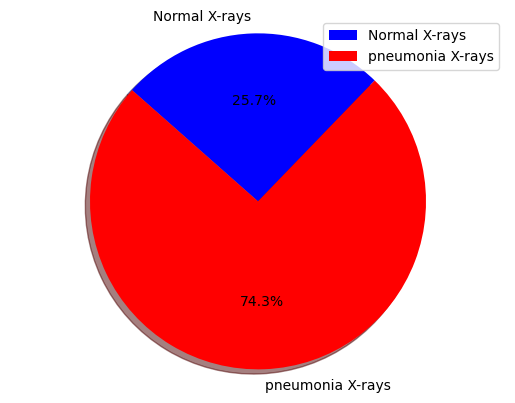

In [ ]:
print("Total number of train normal images:", train_normal_count)
print("Total number of train pneumonia images:", train_pneumonia_count)


fig1,ax1= plt.subplots()
sizes=[train_normal_count, train_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal X-rays","pneumonia X-rays"], autopct="%1.1f%%", shadow=True, colors=["b","r"])
ax1.axis("equal")
plt.legend()
plt.show()

In [ ]:
files = []
for fn in Path(test_path+'\\NORMAL\\').glob("*.jpeg"):
    files.append({"filename": fn.name, "class": 0})

In [ ]:
test_normal=pd.DataFrame.from_dict(files)

In [ ]:
files = []
for fn in Path(test_path+'\\PNEUMONIA\\').glob("*.jpeg"):
    files.append({"filename": fn.name, "class": 1})

In [ ]:
test_pneumonia=pd.DataFrame.from_dict(files)


In [ ]:
test=[test_normal,test_pneumonia]

In [ ]:
test_df=pd.concat(test)

In [ ]:
test_df.head()

,filename,class
0,IM-0001-0001.jpeg,0
1,IM-0003-0001.jpeg,0
2,IM-0005-0001.jpeg,0
3,IM-0006-0001.jpeg,0
4,IM-0007-0001.jpeg,0


In [ ]:
test_normal_count=test_df[test_df['class']==0]["filename"].count()

In [ ]:
test_pneumonia_count=test_df[test_df['class']==1]["filename"].count()

Total number of test normal images: 234
Total number of test pneumonia images: 390


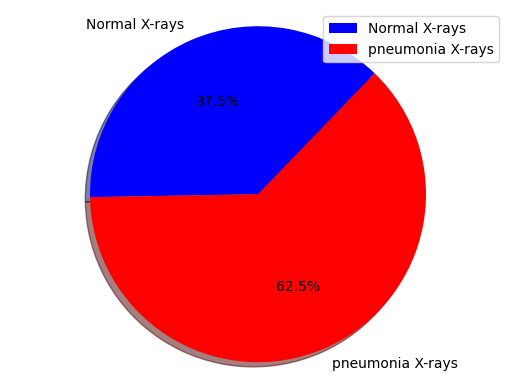

In [ ]:
print("Total number of test normal images:", test_normal_count)
print("Total number of test pneumonia images:", test_pneumonia_count)


fig1,ax1= plt.subplots()
sizes=[test_normal_count, test_pneumonia_count]
ax1.pie(sizes, startangle=46 ,labels=["Normal X-rays","pneumonia X-rays"], autopct="%1.1f%%", shadow=True, colors=["b","r"])
ax1.axis("equal")
plt.legend()
plt.show()


In [ ]:
total=[train_df,test_df]
final_df=pd.concat(total)
df_normal_count=final_df[final_df['class']==0]["filename"].count()
df_pneumonia_count=final_df[final_df['class']==1]["filename"].count()

Total number of normal images: 1575
Total number of pneumonia images: 4265


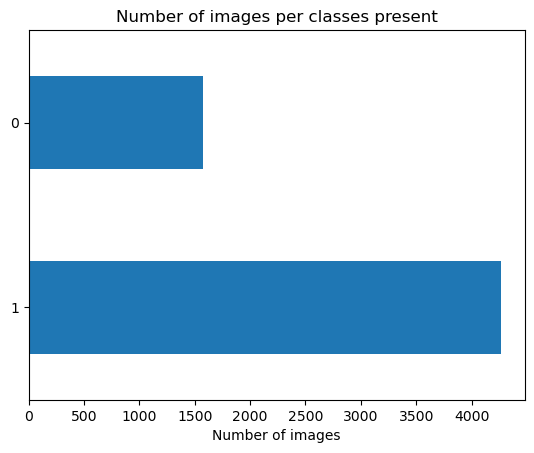

In [ ]:
print("Total number of normal images:", df_normal_count)
print("Total number of pneumonia images:", df_pneumonia_count)

final_df['class'].value_counts().plot.barh()
plt.xlabel("Number of images")
_ = plt.title("Number of images per classes present")

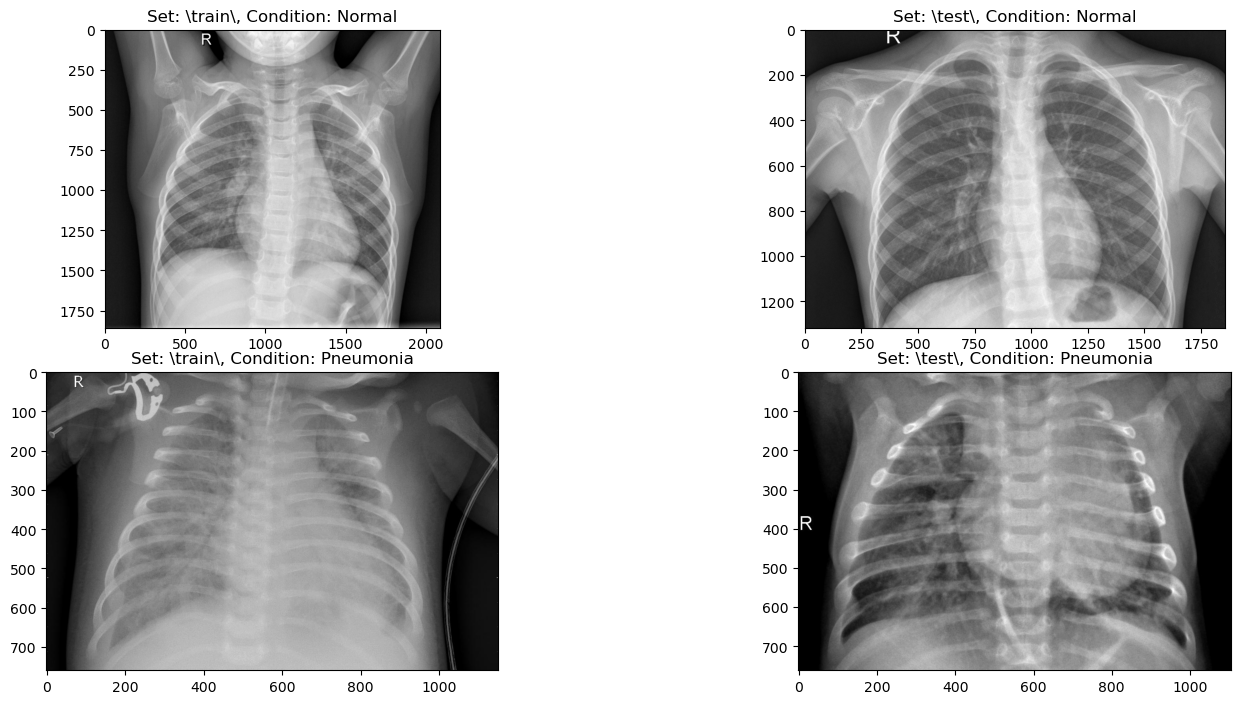

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['\\train\\','\\test\\']):
    set_path = my_data_dir+_set
    ax[i].imshow(plt.imread(set_path+'\\NORMAL\\'+os.listdir(set_path+'\\NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'\\PNEUMONIA\\'+os.listdir(set_path+'\\PNEUMONIA')[0]), cmap='gray')
    ax[i+2].set_title('Set: {}, Condition: Pneumonia'.format(_set))

In [ ]:
os.listdir(train_path+'\\NORMAL')[0]

'IM-0115-0001.jpeg'

In [ ]:
normal_img=train_path+'\\NORMAL'+'\\IM-0115-0001.jpeg'

In [ ]:
normal_img= imread(normal_img)

In [ ]:
normal_img.shape

(1858, 2090)

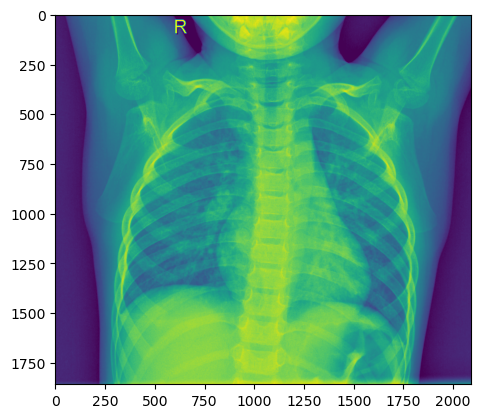

In [ ]:
plt.imshow(normal_img)

In [ ]:
image_shape = (150,150)

In [ ]:
batch_size = 16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape,
                                               #color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_image_gen = test_datagen.flow_from_directory(test_path,
                                               target_size=image_shape,
                                               #color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 624 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
test_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
import tensorflow as tf

In [ ]:
model = tf.keras.applications.VGG16(input_shape=(150, 150,3), include_top=False, weights="imagenet")

In [ ]:
class_weight = {0: 2.8,
                1: 1.0}

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
##units are 1 because we are using binary activation

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(train_image_gen, epochs = 5, validation_data = test_image_gen,verbose=1,callbacks=[lr_reduction])

Epoch 1/5
326/326 [==============================] - 2039s 6s/step - loss: 5.0562 - acc: 0.7418 - val_loss: 0.6854 - val_acc: 0.6250 - lr: 0.0010
Epoch 2/5
326/326 [==============================] - 2623s 8s/step - loss: 0.5729 - acc: 0.7429 - val_loss: 0.6877 - val_acc: 0.6250 - lr: 0.0010
Epoch 3/5
326/326 [==============================] - 1794s 6s/step - loss: 0.5710 - acc: 0.7429 - val_loss: 0.6861 - val_acc: 0.6250 - lr: 0.0010
Epoch 4/5
326/326 [==============================] - 1789s 5s/step - loss: 0.5708 - acc: 0.7429 - val_loss: 0.6967 - val_acc: 0.6250 - lr: 0.0010
Epoch 5/5
326/326 [==============================] - 1970s 6s/step - loss: 0.5706 - acc: 0.7429 - val_loss: 0.6876 - val_acc: 0.6250 - lr: 0.0010


In [ ]:
# the monitored evaluation metrics during the training
model.metrics_names

['loss', 'acc']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,acc,val_loss,val_acc,lr
0,0.590464,0.742523,0.689063,0.625,0.001
1,0.572929,0.742906,0.687721,0.625,0.001
2,0.572227,0.742906,0.717809,0.625,0.001
3,0.571964,0.742906,0.669455,0.625,0.001
4,0.571180,0.742906,0.696799,0.625,0.001


<AxesSubplot: >

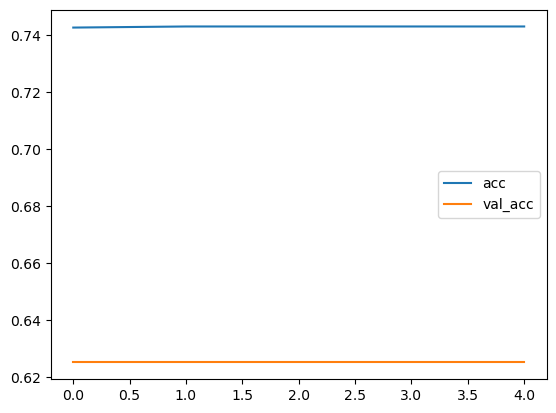

In [ ]:
losses[['acc','val_acc']].plot()

<AxesSubplot: >

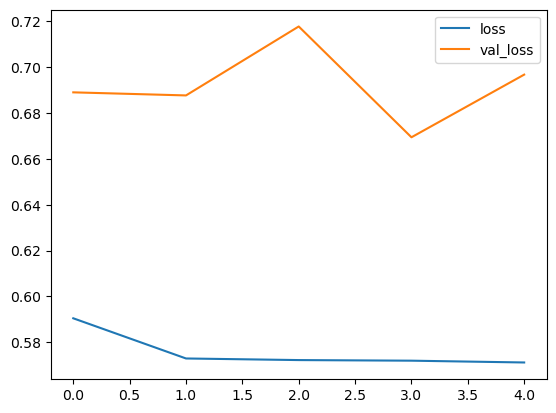

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150,3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [ ]:
img=load(r'C:\Users\lenovo\Desktop\chest_xray\train\NORMAL\IM-0147-0001.jpeg')

In [ ]:
pr=model.predict(img)

1/1 [==============================] - 0s 411ms/step


In [ ]:
if pr > 0.5:
    print(f'Predicted class is not normal')
else:
    print(f'Predicted class is normal')

Predicted class is not normal


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join(r'C:\Users\lenovo\Desktop\chest','chest_VGG16.h5'))

In [ ]:
new_model = load_model(r'C:\Users\lenovo\Desktop\chest\chest_VGG16.h5')

In [ ]:
pr_new=new_model.predict(img)

1/1 [==============================] - 0s 204ms/step


In [ ]:
if pr_new > 0.5:
    print(f'Predicted class is not normal')
else:
    print(f'Predicted class is normal')

Predicted class is not normal
